In [2]:
!pip install datasets
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset

ds = load_dataset("stapesai/ssi-speech-emotion-recognition")
ds

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/373M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/374M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/374M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/223M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1999 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/163 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['file_path', 'emotion', 'emotion_intensity', 'gender', 'age_group', 'dataset', 'speaker_id', 'text', 'utterance_number'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['file_path', 'emotion', 'emotion_intensity', 'gender', 'age_group', 'dataset', 'speaker_id', 'text', 'utterance_number'],
        num_rows: 1999
    })
    test: Dataset({
        features: ['file_path', 'emotion', 'emotion_intensity', 'gender', 'age_group', 'dataset', 'speaker_id', 'text', 'utterance_number'],
        num_rows: 163
    })
})

In [4]:
ds['train'][0]

{'file_path': {'path': '1062_MTI_SAD_XX.wav',
  'array': array([0.00222778, 0.00222778, 0.00253296, ..., 0.        , 0.        ,
         0.        ]),
  'sampling_rate': 16000},
 'emotion': 'SAD',
 'emotion_intensity': 'UNK',
 'gender': 'M',
 'age_group': 'AD',
 'dataset': 'CREMA-D',
 'speaker_id': '1062',
 'text': 'Maybe Tomorrow It will be cold',
 'utterance_number': '01'}

In [5]:
print(ds.column_names)
print(ds['train'].features)

{'train': ['file_path', 'emotion', 'emotion_intensity', 'gender', 'age_group', 'dataset', 'speaker_id', 'text', 'utterance_number'], 'validation': ['file_path', 'emotion', 'emotion_intensity', 'gender', 'age_group', 'dataset', 'speaker_id', 'text', 'utterance_number'], 'test': ['file_path', 'emotion', 'emotion_intensity', 'gender', 'age_group', 'dataset', 'speaker_id', 'text', 'utterance_number']}
{'file_path': Audio(sampling_rate=16000, mono=True, decode=True, id=None), 'emotion': Value(dtype='string', id=None), 'emotion_intensity': Value(dtype='string', id=None), 'gender': Value(dtype='string', id=None), 'age_group': Value(dtype='string', id=None), 'dataset': Value(dtype='string', id=None), 'speaker_id': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None), 'utterance_number': Value(dtype='string', id=None)}


In [6]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)


In [7]:
file_path = ds['train'][0]['file_path']
file_path

{'path': '1062_MTI_SAD_XX.wav',
 'array': array([0.00222778, 0.00222778, 0.00253296, ..., 0.        , 0.        ,
        0.        ]),
 'sampling_rate': 16000}

In [8]:
# Getting the path from the dataset
file_path = ds['train'][0]['file_path']

audio_array = file_path['array']  # Get the audio array
sampling_rate = file_path['sampling_rate']  # Get the sampling rate

# Use torchaudio to work with the audio array
def open_audio_array(audio_array, sampling_rate):
    sig = torch.tensor(audio_array).unsqueeze(0)  # Convert to tensor and add batch dimension
    sr = sampling_rate
    return (sig, sr)

sig, sr = open_audio_array(audio_array, sampling_rate)

print(f"Signal Shape: {sig.shape}, Sample Rate: {sr}")

Signal Shape: torch.Size([1, 33634]), Sample Rate: 16000


In [9]:
from IPython.display import Audio
Audio(data=sig.squeeze().numpy(), rate=sr)

In [10]:
# MONO -> STEREO
def rechannel(aud, new_channel):
    sig, sr = aud

    if sig.shape[0] == new_channel:
        return aud  # No change needed

    if new_channel == 1:
        # Convert from stereo to mono by selecting the first channel
        resig = sig[:1, :]
    else:
        # Convert from mono to stereo by duplicating the first channel
        resig = torch.cat([sig, sig])

    return (resig, sr)

# Sample Hertz
def resample(aud, newsr):
    sig, sr = aud

    if sr == newsr:
        return aud  # No change needed

    num_channels = sig.shape[0]
    # Resample the first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1, :])

    if num_channels > 1:
        # Resample the second channel if it's stereo
        retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:, :])
        resig = torch.cat([resig, retwo])

    return (resig, newsr)

# Audio Length
def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr // 1000 * max_ms  # Convert from ms to samples

    if sig_len > max_len:
        # Truncate the signal to the max length
        sig = sig[:, :max_len]

    elif sig_len < max_len:
        # Calculate padding
        pad_begin_len = random.randint(0, max_len - sig_len)
        pad_end_len = max_len - sig_len - pad_begin_len

        # Add padding to both ends of the signal
        pad_begin = torch.zeros((num_rows, pad_begin_len))
        pad_end = torch.zeros((num_rows, pad_end_len))

        sig = torch.cat((pad_begin, sig, pad_end), 1)

    return (sig, sr)


In [31]:
# Desired parameters
new_channel = 2  # Convert all audio to stereo
new_sr = 16000  # Target sample rate
max_ms = 4000  # Maximum audio length in milliseconds (10 second)


In [32]:

# Process each audio file
def process_audio(audio):
    aud = (torch.tensor(audio['array']).unsqueeze(0).float(), audio['sampling_rate'])

    # Convert to stereo
    aud = rechannel(aud, new_channel)

    # Resample to target sample rate
    aud = resample(aud, new_sr)

    # Pad or truncate to fixed length
    aud = pad_trunc(aud, max_ms)

    return aud

# Apply to the second audio sample in the dataset
audio_sample = ds['train'][1]['file_path']
processed_audio = process_audio(audio_sample)

print(f"Processed signal shape: {processed_audio[0].shape}")  # Should show 2 channels
print(f"Processed sample rate: {processed_audio[1]}")


Processed signal shape: torch.Size([2, 64000])
Processed sample rate: 16000


In [13]:
ds['train'][1]['file_path']

{'path': 'YAF_jug_disgust.wav',
 'array': array([ 1.71918073e-05, -9.31147952e-05, -3.95726936e-04, ...,
         1.22147860e-04, -3.21071348e-05,  0.00000000e+00]),
 'sampling_rate': 16000}

In [33]:
# Function to generate the Mel spectrogram
def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig, sr = aud
    top_db = 80

    # Compute the Mel spectrogram
    spec = transforms.MelSpectrogram(
        sample_rate=sr,
        n_fft=n_fft,
        hop_length=hop_len,
        n_mels=n_mels
    )(sig)

    # Convert the spectrogram to decibel scale
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)

    return spec

# Apply the process to your audio sample
processed_audio = process_audio(audio_sample)

# Generate the Mel spectrogram for the processed audio
mel_spec = spectro_gram(processed_audio)

print(f"Mel Spectrogram shape: {mel_spec.shape}")


Mel Spectrogram shape: torch.Size([2, 64, 126])


3


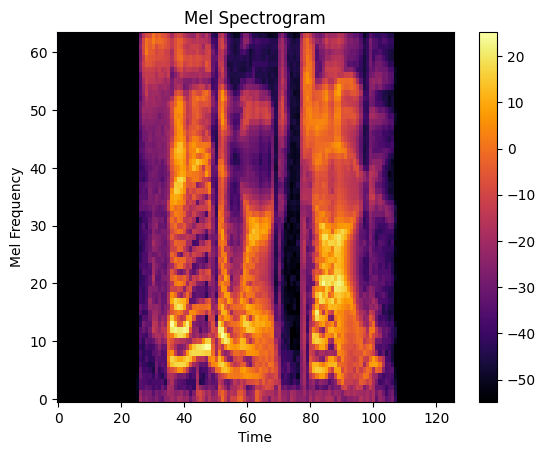

In [34]:
import matplotlib.pyplot as plt

# Function to display the spectrogram
def show_spectrogram(mel_spec, title="Mel Spectrogram"):
    print(mel_spec.dim())
    if mel_spec.dim() == 4:
        # Squeeze to remove the channel dimension
        mel_spec = mel_spec.squeeze(0)

    mel_spec_np = mel_spec.numpy()  # Convert to NumPy array for plotting

    # Plot the spectrogram
    fig, ax = plt.subplots()
    img = ax.imshow(mel_spec_np[0], aspect='auto', origin='lower', cmap='inferno')  # Plot first channel (if stereo)

    # Add color bar
    fig.colorbar(img, ax=ax)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Mel Frequency")

    plt.show()

# Generate Mel spectrogram for processed audio
processed_audio = process_audio(audio_sample)
mel_spec = spectro_gram(processed_audio)

show_spectrogram(mel_spec)


In [29]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

emotion_mapping = {
    'ANG': 0,  # Anger
    'DIS': 1,  # Disgust
    'FEA': 2,  # Fear
    'HAP': 3,  # Happy
    'NEU': 4,  # Neutral
    'SAD': 5,  # Sad
    'CAL': 6,  # Calm
    'SUR': 7   # Surprised
}
class_names = ["Anger", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Calm", "Surprised"]

class SoundDS(Dataset):
  def __init__(self, df, type="train"):
    self.df = df[type]
    self.duration = 10000
    self.sr = 44100
    self.channel = 2

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):

    audio_sample = self.df[idx]['file_path']
    processed_audio = process_audio(audio_sample)

    audio = process_audio(audio_sample)
    sgram = spectro_gram(audio)

    class_id = emotion_mapping[self.df[idx]['emotion']]
    class_id = torch.tensor(class_id)

    return sgram, class_id

torch.Size([2, 64, 126])
tensor(5)
3


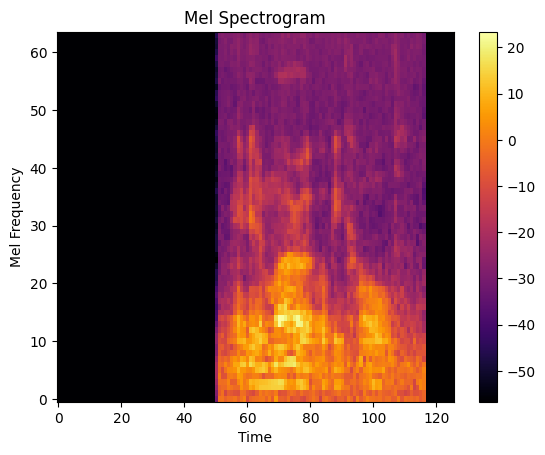

torch.Size([2, 64, 126])
tensor(1)
3


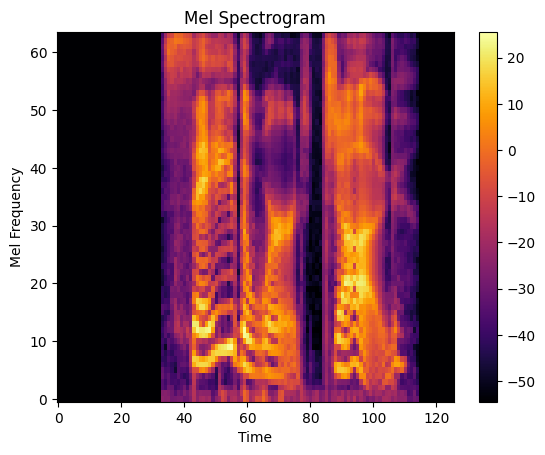

torch.Size([2, 64, 126])
tensor(1)
3


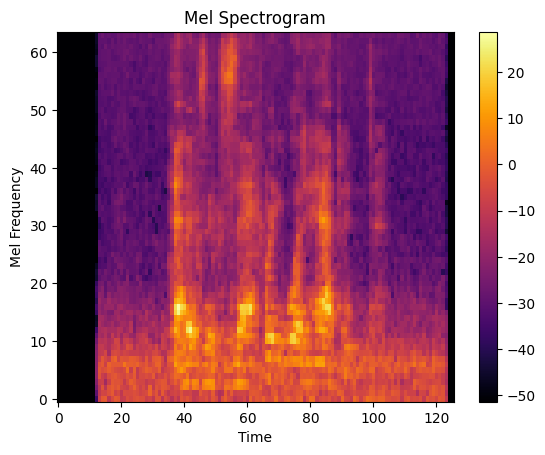

torch.Size([2, 64, 126])
tensor(1)
3


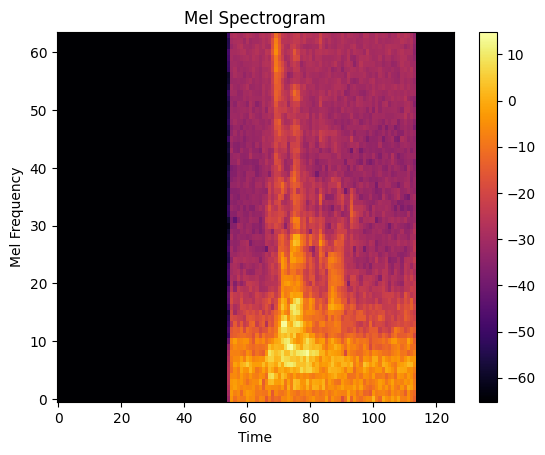

torch.Size([2, 64, 126])
tensor(0)
3


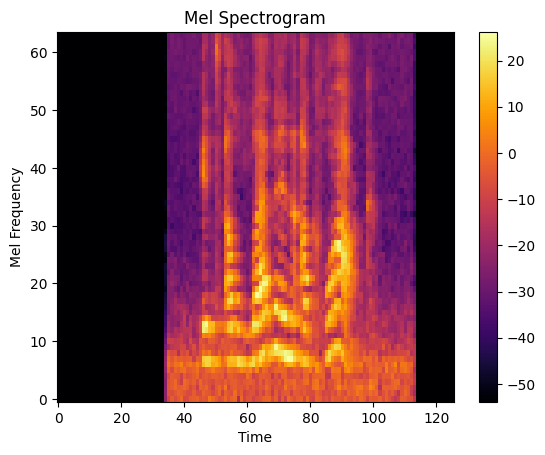

torch.Size([2, 64, 126])
tensor(5)
3


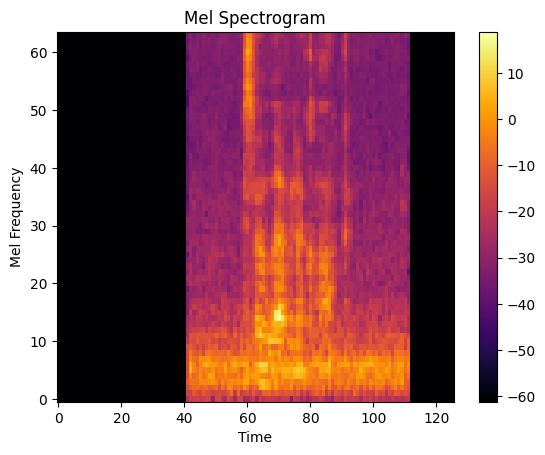

torch.Size([2, 64, 126])
tensor(3)
3


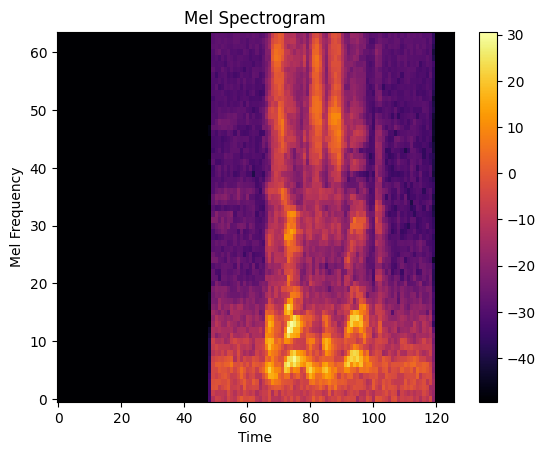

torch.Size([2, 64, 126])
tensor(2)
3


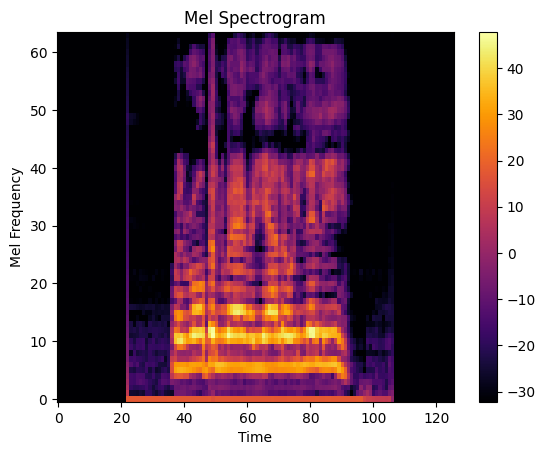

torch.Size([2, 64, 126])
tensor(1)
3


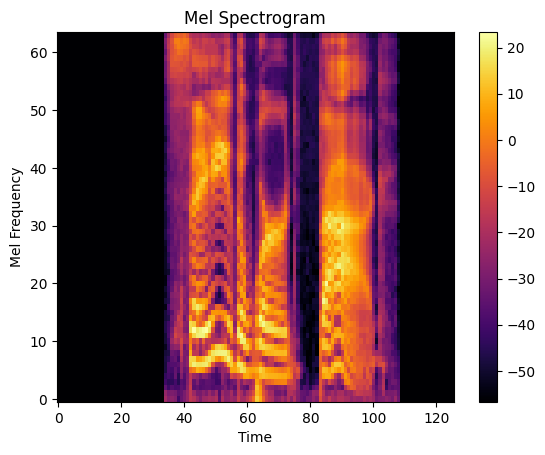

torch.Size([2, 64, 126])
tensor(4)
3


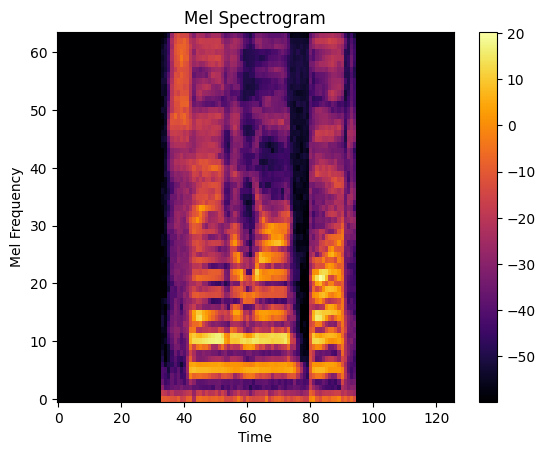

In [35]:
testDS = SoundDS(ds)
for i in range(0,5):
  specto, class_id = testDS[i]
  print(specto.shape)
  print(class_id)
  show_spectrogram(specto)

valDS = SoundDS(ds, type="validation")
for i in range(0,5):
  specto, class_id = valDS[i]
  print(specto.shape)
  print(class_id)
  show_spectrogram(specto)

In [18]:
train_dl = torch.utils.data.DataLoader(testDS, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(valDS, batch_size=16, shuffle=False)


In [19]:
import torch.nn.functional as F
from torch.nn import init
import torch.nn as nn

class AudioClassifier (nn.Module):
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=8)

        self.conv = nn.Sequential(*conv_layers)

    def forward(self, x):
        x = self.conv(x)

        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        return x

myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)

next(myModel.parameters()).device

device(type='cuda', index=0)

In [20]:
def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')

  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    for i, data in enumerate(train_dl):

      inputs, labels = data

      inputs, labels = inputs.to(device), labels.to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Forward + backward + optimize
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      scheduler.step()

      # Keep stats for Loss and Accuracy
      running_loss += loss.item()

      _, prediction = torch.max(outputs, 1)
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

  print('Finished Training')

num_epochs=50
training(myModel, train_dl, num_epochs)

Epoch: 0, Loss: 1.93, Accuracy: 0.26
Epoch: 1, Loss: 1.82, Accuracy: 0.30
Epoch: 2, Loss: 1.74, Accuracy: 0.32
Epoch: 3, Loss: 1.65, Accuracy: 0.35
Epoch: 4, Loss: 1.56, Accuracy: 0.40
Epoch: 5, Loss: 1.48, Accuracy: 0.44
Epoch: 6, Loss: 1.39, Accuracy: 0.47
Epoch: 7, Loss: 1.33, Accuracy: 0.50
Epoch: 8, Loss: 1.26, Accuracy: 0.53
Epoch: 9, Loss: 1.20, Accuracy: 0.54
Epoch: 10, Loss: 1.17, Accuracy: 0.56
Epoch: 11, Loss: 1.13, Accuracy: 0.57
Epoch: 12, Loss: 1.09, Accuracy: 0.59
Epoch: 13, Loss: 1.06, Accuracy: 0.60
Epoch: 14, Loss: 1.03, Accuracy: 0.61
Epoch: 15, Loss: 1.01, Accuracy: 0.62
Epoch: 16, Loss: 0.98, Accuracy: 0.63
Epoch: 17, Loss: 0.97, Accuracy: 0.63
Epoch: 18, Loss: 0.96, Accuracy: 0.64
Epoch: 19, Loss: 0.93, Accuracy: 0.65
Epoch: 20, Loss: 0.91, Accuracy: 0.66
Epoch: 21, Loss: 0.91, Accuracy: 0.66
Epoch: 22, Loss: 0.89, Accuracy: 0.67
Epoch: 23, Loss: 0.88, Accuracy: 0.67
Epoch: 24, Loss: 0.87, Accuracy: 0.67
Epoch: 25, Loss: 0.86, Accuracy: 0.68
Epoch: 26, Loss: 0.85,

In [24]:
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs = model(inputs)

      _, prediction = torch.max(outputs,1)
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

inference(myModel, val_dl)


Accuracy: 0.70, Total items: 1999


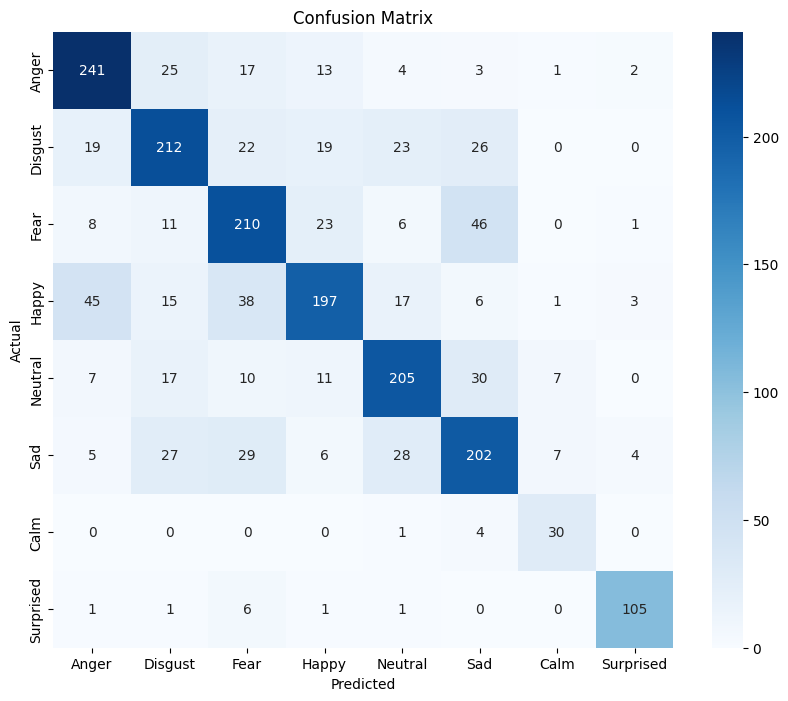

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def get_predictions(model, dataloader):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            predictions.extend(predicted.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    return predictions, actuals

predictions, actuals = get_predictions(myModel, val_dl)

conf_matrix = confusion_matrix(actuals, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [23]:
model_path = "audio_emotion_model.pth"

torch.save(myModel.state_dict(), model_path)
